In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

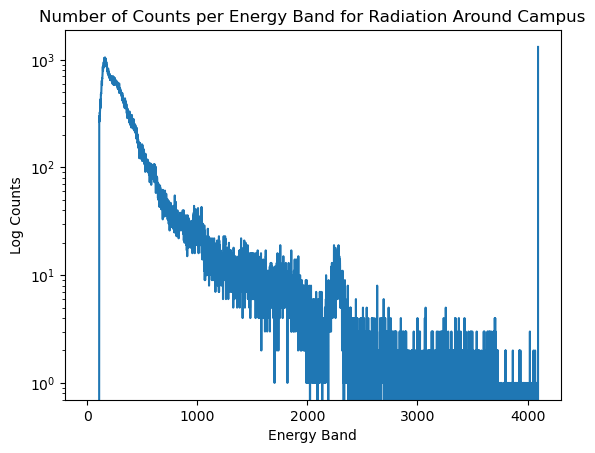

In [44]:
spectra = np.genfromtxt(r"C:\Users\erich\Downloads\GPS_GUI_Spectrum_Data_2023-04-21_16_34_37.csv", skip_header=1, delimiter=",", max_rows=1136)
spectra = np.delete(spectra, 0, 1)
spectraplot = spectra.sum(axis=0)

plt.plot(spectraplot)
plt.yscale('log')
plt.xlabel('Energy Band')
plt.ylabel('Log Counts')
plt.title('Number of Counts per Energy Band for Radiation Around Campus')
plt.show()


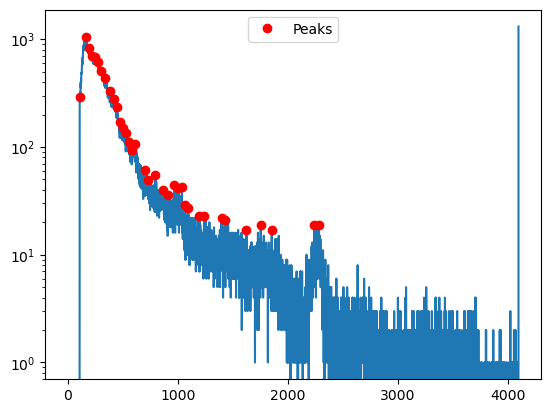

Energy levels of the peaks (in keV): [  71  106  124  142  160  180  197  223  250  273  292  312  328  344
  362  379  398  459  477  517  564  592  631  654  675  691  712  777
  805  908  927 1053 1139 1204 1456 1482]


In [46]:
spectra = np.genfromtxt(r"C:\Users\erich\Downloads\GPS_GUI_Spectrum_Data_2023-04-21_16_34_37.csv", skip_header=1, delimiter=",", max_rows=1136)
spectra = np.delete(spectra, 0, 1)
spectraplot = spectra.sum(axis=0)

# Find the peaks
peaks, _ = find_peaks(spectraplot, prominence=15, distance=25)

# Convert the peak indices to keV
peaks_keV = peaks / 1.54

# Plot the data
plt.plot(spectraplot)

# Plot the peaks
plt.plot(peaks, spectraplot[peaks], "ro", label="Peaks")

plt.yscale('log')
plt.legend()
plt.show()

# Print the energy levels of the peaks in keV
print("Energy levels of the peaks (in keV):", np.round(peaks_keV).astype(int))


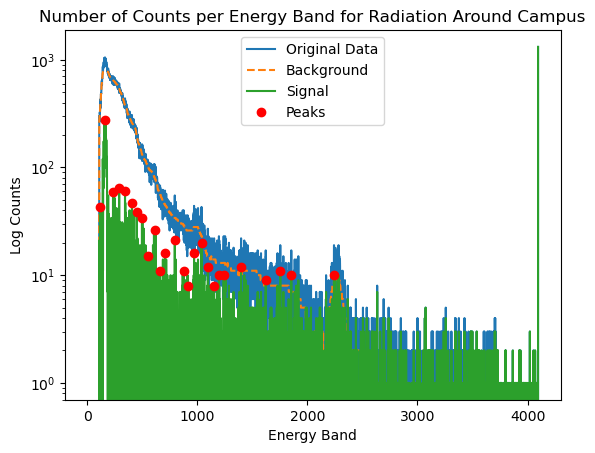

Energy levels of the peaks (in keV): [  77  106  153  189  223  264  292  326  357  398  430  459  517  569
  597  631  675  712  749  777  805  908 1053 1139 1204 1456]


In [47]:
spectra = np.genfromtxt(r"C:\Users\erich\Downloads\GPS_GUI_Spectrum_Data_2023-04-21_16_34_37.csv", skip_header=1, delimiter=",", max_rows=1136)
spectra = np.delete(spectra, 0, 1)
spectraplot = spectra.sum(axis=0)

# Estimate the background
window_size = 101  
background = pd.Series(spectraplot).rolling(window=window_size, center=True, min_periods=1).median()

# Subtract the background from the data
signal = spectraplot - background

# Find the peaks
peaks, _ = find_peaks(signal, prominence=15, distance=42)  
# Convert the peak indices to keV
peaks_keV = peaks / 1.54

# Plot the original data, background, and signal
plt.plot(spectraplot, label="Original Data")
plt.plot(background, label="Background", linestyle="--")
plt.plot(signal, label="Signal")

# Plot the peaks
plt.plot(peaks, signal[peaks], "ro", label="Peaks")

plt.yscale('log')
plt.legend()
plt.xlabel('Energy Band')
plt.ylabel('Log Counts')
plt.title('Number of Counts per Energy Band for Radiation Around Campus')
plt.show()

# Print the energy levels of the peaks in keV
print("Energy levels of the peaks (in keV):", np.round(peaks_keV).astype(int))
